In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px
pd.set_option("display.max_rows", None, "display.max_columns", None)
from sklearn.model_selection import train_test_split
import imblearn #Major library - Please ensure this is installed
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

#-------------------------------------------------------------------
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

#-------------------------------------------------------------------
random.seed(100)

## Loading Data 
In this notebook, we are using the credit card fraud detection dataset. Since a fraud occurs rarely, the target variable is severely imbalanced, making it a perfect case to solve through different sampling methods as prescribed below. The link and detailed description to the original data can be found here : https://www.kaggle.com/mlg-ulb/creditcardfraud

In [3]:
dataset = pd.read_csv(r"../input/creditcardfraud/creditcard.csv")

#------------------------------------------------------------------------------------------------
#Summary
print('Total Shape :',dataset.shape)
dataset.head()

Total Shape : (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## About the dataset:
1. The dataset consists of 29 principal components already extracted in the source dataset. The column names have been anonymized for business confidentiality purpose 
2. The time column is for the purpose of level and the Class column is the target variable we aim to predict (Binary Classification : 0 for Non-fraud and 1 for fraud 
3. Since the dataset comprises of principle components of the raw features/attributes, they are already scaled. But in real life problems apart form this notebook, the features need to be scaled as all of the sampling techniques employ distance (Euclidean primarily) for their internal functioning

### Null Check  

In [5]:
pd.DataFrame(dataset.isnull().sum()).T 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Minority Class contribution in the dataset 

In [6]:
print('Total fraud(Class = 1) and not-fraud(Class = 0) :\n',dataset['Class'].value_counts())
print('Percentage of minority samples over total Data :',100 * dataset[dataset['Class']==1].shape[0]/dataset.shape[0],'%')

Total fraud(Class = 1) and not-fraud(Class = 0) :
 0    284315
1       492
Name: Class, dtype: int64
Percentage of minority samples over total Data : 0.1727485630620034 %


## Insight:
1. The %contribution of Class 1 i.e fraud is abysmally low (~0.17%), hence the model will not be able to learn properly on the patterns of a fraud and hence the prediction quality will be poor. 
2. To remediate the above case, we have an array of sampling techniques at our disposal which lead us to overcome the problem of imbalance classification

# Splitting the data to get a baseline performance before sampling  

In [7]:
# Test Train Split for modelling purpose
X = dataset.loc[:,[cols for cols in dataset.columns if ('Class' not in cols) & ('Time' not in cols)]] #Removing time since its a level column
y = dataset.loc[:,[cols for cols in dataset.columns if 'Class' in cols]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=100)

#----------------------------------------------------------------------------------------------------
print('Total Shape of Train X:',X_train.shape)
print('Total Shape of Train Y:',y_train.shape)

Total Shape of Train X: (190820, 29)
Total Shape of Train Y: (190820, 1)


## UDF for 3-d plotting of the data

In [8]:
def plot_3d(df,col1,col2,col3,hue_elem,name):
    
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(df[col1], df[col2], df[col3], c=df[hue_elem], marker='o')

    title = 'Scatter plot for :' + name
    ax.set_title(title)
    ax.set_xlabel(col1+' Label')
    ax.set_ylabel(col2+' Label')
    ax.set_zlabel(col3+' Label')
    
    plt.show()
    

# Unsampled data in 3-d axis (3 Principal Components)

Percentage of minority samples over Training Data : 0.1776543339272613 %


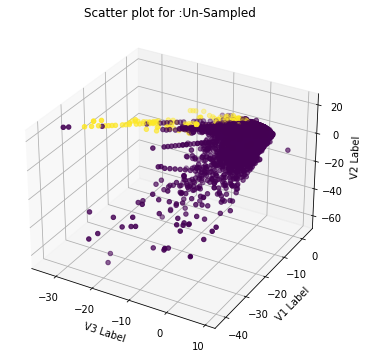

In [9]:
train = X_train.join(y_train)
print('Percentage of minority samples over Training Data :',100 * train[train['Class']==1].shape[0]/train.shape[0],'%')

#-----------------------------------------------------------------------------------------------------------------------
plot_3d(train,'V3','V1','V2','Class','Un-Sampled')

# Baseline - Logistic Regression Model on imbalanced data (~0.17%)

In [10]:
lr_clf = LogisticRegression(solver='sag',random_state=100)

lr_clf.fit(X_train,y_train)

pred = lr_clf.predict(X_test)

#-----------------------------------------------
score = roc_auc_score(y_test, pred)
print('1. ROC AUC: %.3f' % score)
print('2. Accuracy :',accuracy_score(y_test, pred))
print('3. Classification Report -\n',classification_report(y_test, pred))
print('4. Confusion Matrix - \n',confusion_matrix(y_test, pred))

1. ROC AUC: 0.536
2. Accuracy : 0.9982763573685722
3. Classification Report -
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93834
           1       0.35      0.07      0.12       153

    accuracy                           1.00     93987
   macro avg       0.68      0.54      0.56     93987
weighted avg       1.00      1.00      1.00     93987

4. Confusion Matrix - 
 [[93814    20]
 [  142    11]]


# Baseline - XGB Model on imbalanced data (~0.17%)

In [11]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(random_state=100)
xgb_clf.fit(X_train,y_train)
xgb_pred = xgb_clf.predict(X_test)

#-----------------------------------------------
score = roc_auc_score(y_test, xgb_pred)
print('1. ROC AUC: %.3f' % score)
print('2. Accuracy :',accuracy_score(y_test, xgb_pred))
print('3. Classification Report -\n',classification_report(y_test, xgb_pred))
print('4. Confusion Matrix - \n',confusion_matrix(y_test, xgb_pred))

[16:55:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1. ROC AUC: 0.879
2. Accuracy : 0.9995105706108292
3. Classification Report -
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93834
           1       0.93      0.76      0.83       153

    accuracy                           1.00     93987
   macro avg       0.96      0.88      0.92     93987
weighted avg       1.00      1.00      1.00     93987

4. Confusion Matrix - 
 [[93825     9]
 [   37   116]]


# Baseline - Random Forest Model on imbalanced data (~0.17%)

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=100,n_jobs=-1)
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)

#-----------------------------------------------
score = roc_auc_score(y_test, rf_pred)
print('1. ROC AUC: %.3f' % score)
print('2. Accuracy :',accuracy_score(y_test, rf_pred))
print('3. Classification Report -\n',classification_report(y_test, rf_pred))
print('4. Confusion Matrix - \n',confusion_matrix(y_test, rf_pred))

1. ROC AUC: 0.879
2. Accuracy : 0.9994573717641801
3. Classification Report -
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93834
           1       0.89      0.76      0.82       153

    accuracy                           1.00     93987
   macro avg       0.95      0.88      0.91     93987
weighted avg       1.00      1.00      1.00     93987

4. Confusion Matrix - 
 [[93820    14]
 [   37   116]]


## Insights - 
1. Though the accuracy is >99%, the recall of the class 1 (fraud) is low. This is a typical observation in any imbalanced classification problem. 
2. The accuracy is not a reliable metric. Here, ROC AUC makes more sense to compare. 

# Sampling Techniques :
1. Over-Sampling Techniques
    1. SMOTE
    2. Borderline SMOTE
    3. ADASYN
    
2. Under-Sampling Techniques
    1. Random Under-sampling
    2. Near Miss 1,2,3
    3. Condensed Nearest Neighors
    4. Tomek Links Removal
    5. One Sided Selection
    
All the above techniques can be found in one package 'imblearn'. The link for the official documentation is following:
https://imbalanced-learn.org/stable/references/index.html

## SMOTE (Synthetic Minority Oversampling Technique)

Reference Links - https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

Percentage of minority samples over Training Data : 9.090865703554162 %


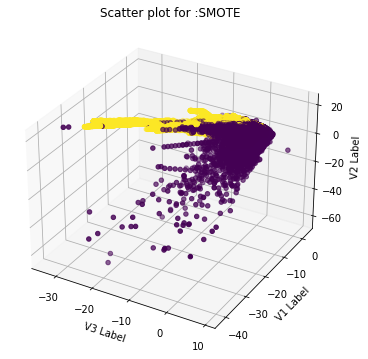

In [13]:
from imblearn.over_sampling import SMOTE 

#------------------------------------------------------------------------------------------
oversample = SMOTE(sampling_strategy=0.10,k_neighbors=3,random_state=100,n_jobs=-1)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

#------------------------------------------------------------------------------------------
train_smote = X_train_smote.join(y_train_smote)
print('Percentage of minority samples over Training Data :',
      100 * train_smote[train_smote['Class']==1].shape[0]/train_smote.shape[0],'%')

#------------------------------------------------------------------------------------------
plot_3d(train_smote,'V3','V1','V2','Class','SMOTE')

## Borderline SMOTE:
Reference Links- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.BorderlineSMOTE.html

Percentage of minority samples over Training Data : 9.090865703554162 %


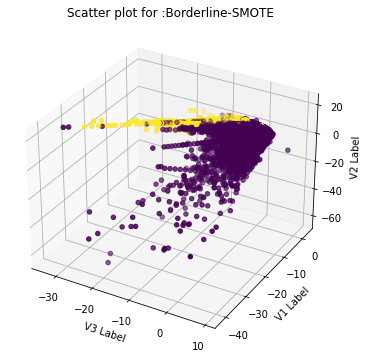

In [14]:
from imblearn.over_sampling import BorderlineSMOTE 

#--------------------------------------------------------------------------------------
bsmote = BorderlineSMOTE(sampling_strategy=0.10,k_neighbors=3,m_neighbors=5,random_state=100,n_jobs=-1)
X_train_bsmote, y_train_bsmote = bsmote.fit_resample(X_train, y_train)

#--------------------------------------------------------------------------------------
train_bsmote = X_train_bsmote.join(y_train_bsmote)
print('Percentage of minority samples over Training Data :',
      100 * train_bsmote[train_bsmote['Class']==1].shape[0]/train_bsmote.shape[0],'%')

#--------------------------------------------------------------------------------------
plot_3d(train_bsmote,'V3','V1','V2','Class','Borderline-SMOTE')

## ADASYN (Adaptive Synthetic Minority Sampling)
Reference Links - https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html

Total datapoints : (209560, 30)
Percentage of minority samples over Training Data : 9.104313800343578 %


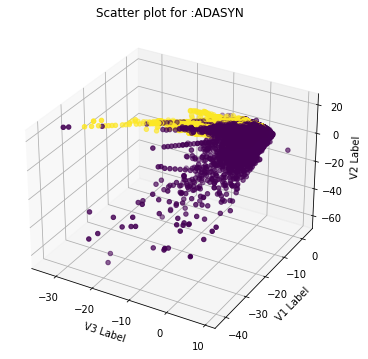

In [15]:
# transform the dataset
from imblearn.over_sampling import ADASYN 

adasyn = ADASYN(sampling_strategy=0.10,n_neighbors=5,random_state=100,n_jobs=-1)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

#-----------------------------------------------------------------------------------
train_adasyn = X_train_adasyn.join(y_train_adasyn)
print('Total datapoints :',train_adasyn.shape)
print('Percentage of minority samples over Training Data :',
      100 * train_adasyn[train_adasyn['Class']==1].shape[0]/train_adasyn.shape[0],'%')


#--------------------------------------------------------------------------------------
plot_3d(train_adasyn,'V3','V1','V2','Class','ADASYN')


# Under-Sampling Techniques

## Random Undersampling
Reference Links - https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html

Percentage of minority samples over Training Data : 9.090909090909092 %


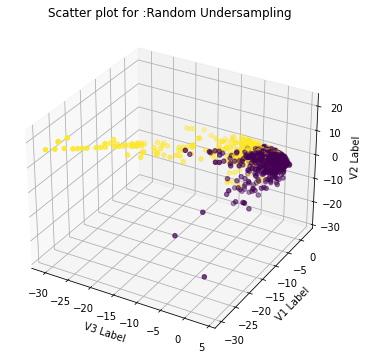

In [16]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = 0.10,replacement=False,random_state=100)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

#-----------------------------------------------------------------------------------
train_rus = X_train_rus.join(y_train_rus)
print('Percentage of minority samples over Training Data :',
      100 * train_rus[train_rus['Class']==1].shape[0]/train_rus.shape[0],'%')

#-----------------------------------------------------------------------------------
plot_3d(train_rus,'V3','V1','V2','Class','Random Undersampling')

## Near-Miss Undersampling
Reference Links - https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

## Near-Miss 1

Value Counts :
 0    3390
1     339
Name: Class, dtype: int64
Percentage of minority samples over Training Data : 9.090909090909092 %


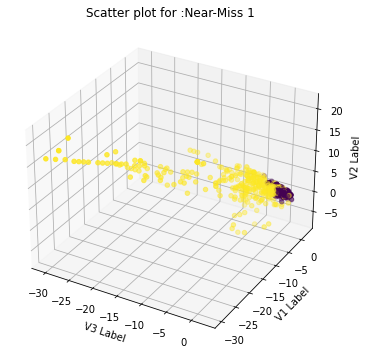

In [17]:
from imblearn.under_sampling import NearMiss 

nm = NearMiss(sampling_strategy=0.10,n_neighbors=1,version=1,n_jobs=-1)
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)

#-----------------------------------------------------------------------------------
train_nm = X_train_nm.join(y_train_nm)
print('Value Counts :\n',train_nm['Class'].value_counts())
print('Percentage of minority samples over Training Data :',
      100 * train_nm[train_nm['Class']==1].shape[0]/train_nm.shape[0],'%')

#-----------------------------------------------------------------------------------
plot_3d(train_nm,'V3','V1','V2','Class','Near-Miss 1')

## Near-Miss 2

Value Counts :
 0    3390
1     339
Name: Class, dtype: int64
Percentage of minority samples over Training Data : 9.090909090909092 %


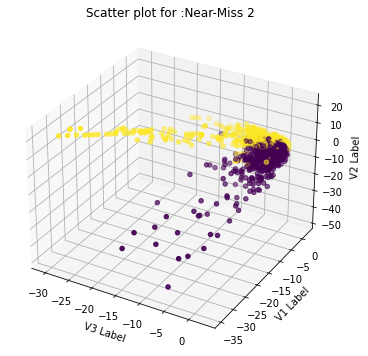

In [18]:
from imblearn.under_sampling import NearMiss 

nm = NearMiss(sampling_strategy=0.10,n_neighbors=1,version=2,n_jobs=-1)
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)

#-----------------------------------------------------------------------------------
train_nm = X_train_nm.join(y_train_nm)
print('Value Counts :\n',train_nm['Class'].value_counts())
print('Percentage of minority samples over Training Data :',
      100 * train_nm[train_nm['Class']==1].shape[0]/train_nm.shape[0],'%')

#-----------------------------------------------------------------------------------
plot_3d(train_nm,'V3','V1','V2','Class','Near-Miss 2')

## Near-Miss 3

Value Counts :
 0    3278
1     339
Name: Class, dtype: int64
Note : For Near-Miss-3, the desired ratio parameter doesnt work due to the nature of the algorithm
Percentage of minority samples over Training Data : 9.372408072988664 %


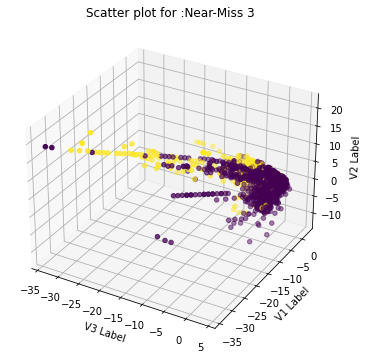

In [19]:
from imblearn.under_sampling import NearMiss 

nm = NearMiss(sampling_strategy=0.10,n_neighbors_ver3=20,version=3,n_jobs=-1) #n_neighbors_value arrived at w/ hit and trial
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)

#------------------------------------------------------------------------------------------------------------
train_nm = X_train_nm.join(y_train_nm)
print('Value Counts :\n',train_nm['Class'].value_counts())
print('Note : For Near-Miss-3, the desired ratio parameter doesnt work due to the nature of the algorithm')
print('Percentage of minority samples over Training Data :',
      100 * train_nm[train_nm['Class']==1].shape[0]/train_nm.shape[0],'%')

#------------------------------------------------------------------------------------------------------------
plot_3d(train_nm,'V3','V1','V2','Class','Near-Miss 3')

## Note - 
For the techniques CNN, Tomek Links and OSS, the run-time is very high due to elementwise operation. Hence for the scope of this notebook, we will decrease the total rows to undersample. 

## CNN (Condensed Nearest Neighbors)
Reference Links - https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.CondensedNearestNeighbour.html

Value Counts :
 0    3278
1     339
Name: Class, dtype: int64
Percentage of minority samples over Training Data : 29.72972972972973 %


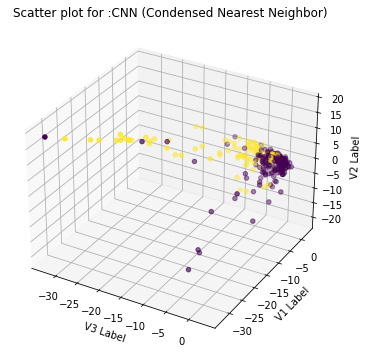

In [20]:
from imblearn.under_sampling import CondensedNearestNeighbour 

CNN = CondensedNearestNeighbour(sampling_strategy='auto',n_seeds_S=100,
                                n_neighbors=1,random_state=100,n_jobs=-1)
X_train_cnn, y_train_cnn = CNN.fit_resample(X_train[0:50000], y_train[0:50000]) #Reduced data for the purpose of low run-time. In realtime, use the full data

#-----------------------------------------------------------------------------------------------------------------
train_cnn = X_train_cnn.join(y_train_cnn)
print('Value Counts :\n',train_nm['Class'].value_counts())
print('Percentage of minority samples over Training Data :',
      100 * train_cnn[train_cnn['Class']==1].shape[0]/train_cnn.shape[0],'%')

#-----------------------------------------------------------------------------------------------------------------
plot_3d(train_cnn,'V3','V1','V2','Class','CNN (Condensed Nearest Neighbor)')

## Tomek Links Removal
Reference Links - https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html

Percentage of minority samples over Training Data : 0.19801188071284276 %


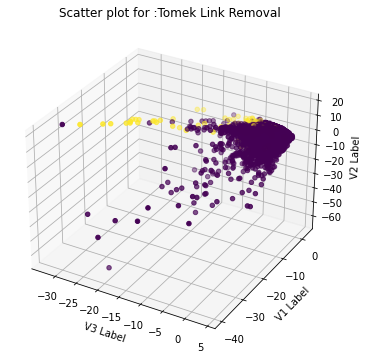

In [21]:
from imblearn.under_sampling import TomekLinks 

tomek = TomekLinks(sampling_strategy='auto',n_jobs=-1)
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train[0:50000], y_train[0:50000])#Reduced data for the purpose of low run-time. In realtime, use the full data


#-----------------------------------------------------------------------------------
train_tomek = X_train_tomek.join(y_train_tomek)
print('Percentage of minority samples over Training Data :',
      100 * train_tomek[train_tomek['Class']==1].shape[0]/train_tomek.shape[0],'%')

#-----------------------------------------------------------------------------------------------------------------
plot_3d(train_tomek,'V3','V1','V2','Class','Tomek Link Removal')

## One Sided Selection (OSS)
- This doesn't return records as per the desired ratio
- Reference Links - https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html

Percentage of minority samples over Training Data : 1.038889399650639 %


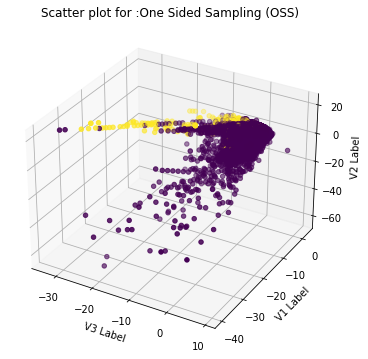

In [22]:
from imblearn.under_sampling import OneSidedSelection 

OSS = OneSidedSelection(sampling_strategy='auto',n_neighbors=9,
                        n_seeds_S=100,random_state=100,n_jobs=-1)
X_train_oss, y_train_oss = OSS.fit_resample(X_train, y_train)

#------------------------------------------------------------------------------------------------------------
train_oss = X_train_oss.join(y_train_oss)
print('Percentage of minority samples over Training Data :',
      100 * train_oss[train_oss['Class']==1].shape[0]/train_oss.shape[0],'%')

#------------------------------------------------------------------------------------------------------------
plot_3d(train_oss,'V3','V1','V2','Class','One Sided Sampling (OSS)')

In [23]:
print(X_train_oss.shape)
X_train_oss.head(1)

(32631, 29)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.85626,-1.487564,0.086317,0.141686,0.317396,-0.588703,0.08724,0.418946,0.210688,-1.080059,-1.778271,0.227061,0.922486,0.234013,0.816856,0.429271,-0.727765,0.878697,0.163481,0.849494,0.63606,0.883092,0.430399,-0.697313,-0.609175,-0.275289,0.082681,-0.063929,257.32


# Passing under-sampled data into model for training

In [24]:
## Final X-Y pair of training to pass (Pick any technique to experiment on)
X_train_final = X_train_adasyn.copy()
y_train_final = y_train_adasyn.copy()

#-----------------------------------------------------------------------------
train_final = X_train_final.join(y_train_final)
print('Percentage of minority samples over Final Training Data :',
      100 * train_final[train_final['Class']==1].shape[0]/train_final.shape[0],'%')

Percentage of minority samples over Final Training Data : 9.104313800343578 %


# Final Model - Logistic Regression Model on imbalanced data (~9%)

In [25]:
lr_clf = LogisticRegression(solver='sag',random_state=100)
lr_clf.fit(X_train_final,y_train_final)
pred = lr_clf.predict(X_test)

#-----------------------------------------------
score = roc_auc_score(y_test, pred)
print('1. ROC AUC: %.3f' % score)
print('2. Accuracy :',accuracy_score(y_test, pred))
print('3. Classification Report -\n',classification_report(y_test, pred))
print('4. Confusion Matrix - \n',confusion_matrix(y_test, pred))

1. ROC AUC: 0.886
2. Accuracy : 0.9813059252875398
3. Classification Report -
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     93834
           1       0.07      0.79      0.12       153

    accuracy                           0.98     93987
   macro avg       0.53      0.89      0.56     93987
weighted avg       1.00      0.98      0.99     93987

4. Confusion Matrix - 
 [[92109  1725]
 [   32   121]]


# Final Model - XGB Classification Model on imbalanced data (~9%)

In [26]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(random_state=100,n_jobs=-1)
xgb_clf.fit(X_train_final,y_train_final)
xgb_pred = xgb_clf.predict(X_test)

#-----------------------------------------------
score = roc_auc_score(y_test, xgb_pred)
print('1. ROC AUC: %.3f' % score)
print('2. Accuracy :',accuracy_score(y_test, xgb_pred))
print('3. Classification Report -\n',classification_report(y_test, xgb_pred))
print('4. Confusion Matrix - \n',confusion_matrix(y_test, xgb_pred))

[17:03:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1. ROC AUC: 0.912
2. Accuracy : 0.9994999308414994
3. Classification Report -
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93834
           1       0.86      0.82      0.84       153

    accuracy                           1.00     93987
   macro avg       0.93      0.91      0.92     93987
weighted avg       1.00      1.00      1.00     93987

4. Confusion Matrix - 
 [[93814    20]
 [   27   126]]


# Final Model - Random Forest Model on imbalanced data (~9%)

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=100,n_jobs=-1)
rf_clf.fit(X_train_final,y_train_final)
rf_pred = rf_clf.predict(X_test)

#-----------------------------------------------
score = roc_auc_score(y_test, rf_pred)
print('1. ROC AUC: %.3f' % score)
print('2. Accuracy :',accuracy_score(y_test, rf_pred))
print('3. Classification Report -\n',classification_report(y_test, rf_pred))
print('4. Confusion Matrix - \n',confusion_matrix(y_test, rf_pred))

1. ROC AUC: 0.902
2. Accuracy : 0.9994041729175311
3. Classification Report -
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93834
           1       0.83      0.80      0.81       153

    accuracy                           1.00     93987
   macro avg       0.91      0.90      0.91     93987
weighted avg       1.00      1.00      1.00     93987

4. Confusion Matrix - 
 [[93808    26]
 [   30   123]]


## Insight : 
1. The ROC AUC after sampling has increased to ~0.91 from ~0.84, a significant improvment, which is reflecting in the increase in recall as well. The increase in recall usually comes at the loss of precision of that concerned class. 

# Tips to use Sampling Techniques -

1. First, all the techniques are tried out separately to assess their impact on the problem at hand
2. If these techniques don't work directly, combining them is a good next step. RUS + OSS was used in the EGA project as well
3. Usual chronology of execution: 
    1. Sampling
    2. Feature Selection
    3. Model Building & Evaluation

# END